# Grid Cell Phase Coding 

The second cell will load the trial data. There are some parameters that can be changed - which **dataset** (1-8) and analysis **type** (spatial/temporal). 

Once the "trial" is initialized, "phase_analysis()" can be run on it to return the correlation value. There are then a number of graph functions that can be run: XY_plot(), phase_plot(), phase_map_plot(), trajectory_plot(), prediction_plot() and corr_plot(). 

Once the parameters in the second cell are set, the whole notebook can be ran via "Cell" -> "Run All"

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#Some display options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sub_bulk_analysis_mpm
import os
import glob
import numpy as np

dir = 'datasets/'

In [3]:
true_angles = []
h1 = []

for trial in range(1,8):
        
    #XYspkT
    XYspkT = np.loadtxt(dir+str(trial)+'/XYspkT.csv', delimiter=',')
        
    #xyPos
    xyPos = np.loadtxt(dir+str(trial)+'/xyPos.csv', delimiter=',')
        
    #Phase
    phase = np.loadtxt(dir+str(trial)+'/Phase.csv', delimiter=',')
        
    #spkT
    spkT = np.loadtxt(dir+str(trial)+'/spkT.csv', delimiter=',')

    #raw = np.loadtxt(dir+str(trial)+'/MeanPhaseMap.csv',delimiter=',')
    #Flipping to align + stripping erraneous values
    #raw_mpm = np.flip(raw,axis=0)
        
    run = sub_bulk_analysis_mpm.gridCells(XYspkT, xyPos, phase, spkT, 'temporal', control=False)
    run.phase_analysis()
    true_angles.append(run.angles)
    h1.append(run.heatmap)
    

/home/daniel/anaconda3/lib/python3.7/site-packages/pycircstat/descriptive.py:340: RuntimeWarning: invalid value encountered in cdouble_scalars
  np.sum(w, axis=axis))
/home/daniel/PycharmProjects/Grid-Cell/sub_bulk_analysis_mpm.py:46: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  np_dfp = np.pad(phase_df.as_matrix(), 1, 'constant', constant_values=np.nan)


In [6]:
false_angles = []
h2 = []

for trial in range(1,8):
        
    #XYspkT
    XYspkT = np.loadtxt(dir+str(trial)+'/XYspkT.csv', delimiter=',')
        
    #xyPos
    xyPos = np.loadtxt(dir+str(trial)+'/xyPos.csv', delimiter=',')
        
    #Phase
    phase = np.loadtxt(dir+str(trial)+'/Phase.csv', delimiter=',')
        
    #spkT
    spkT = np.loadtxt(dir+str(trial)+'/spkT.csv', delimiter=',')

    #raw = np.loadtxt(dir+str(trial)+'/MeanPhaseMap.csv',delimiter=',')
    #Flipping to align + stripping erraneous values
    #raw_mpm = np.flip(raw,axis=0)
        
    run = sub_bulk_analysis_mpm.gridCells(XYspkT, xyPos, phase, spkT, 'temporal', control=True)
    run.phase_analysis()
    false_angles.append(run.angles)
    h2.append(run.heatmap)
    

In [7]:
all_h1 = h1[0] + h1[1] + h1[2] + h1[3] + h1[4] + h1[5] + h1[6]
all_h2 = h2[0] + h2[1] + h2[2] + h2[3] + h2[4] + h2[5] + h2[6]

true_angles = np.asarray(true_angles)
true_angles = np.concatenate(([true_angles[i] for i in range(len(true_angles))]))

false_angles = np.asarray(false_angles)
false_angles = np.concatenate(([false_angles[i] for i in range(len(false_angles))]))

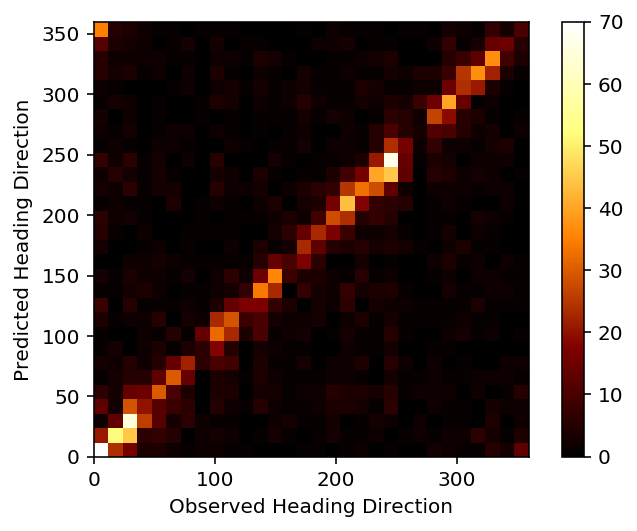

In [5]:
heatmap, xedges, yedges = np.histogram2d(true_angles[:, 0], true_angles[:, 1], bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(all_h1.T, extent=extent, origin='lower', cmap='afmhot')
plt.colorbar()
plt.ylabel('Predicted Heading Direction')
plt.xlabel('Observed Heading Direction')
plt.show()

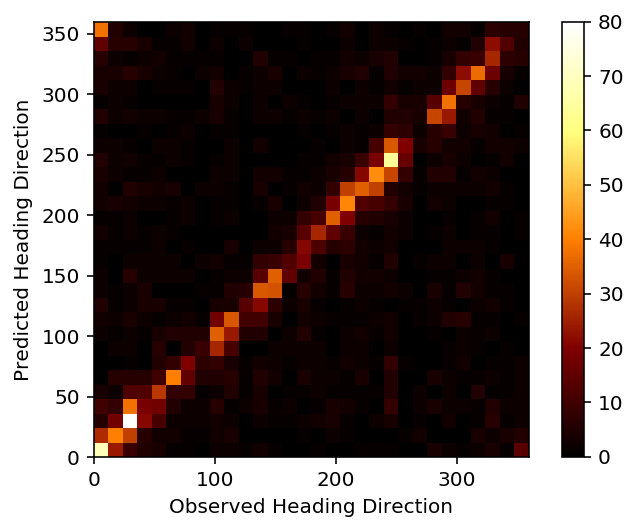

In [8]:
heatmap, xedges, yedges = np.histogram2d(false_angles[:, 0], false_angles[:, 1], bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(all_h2.T, extent=extent, origin='lower', cmap='afmhot')
plt.colorbar()
plt.ylabel('Predicted Heading Direction')
plt.xlabel('Observed Heading Direction')
plt.show()

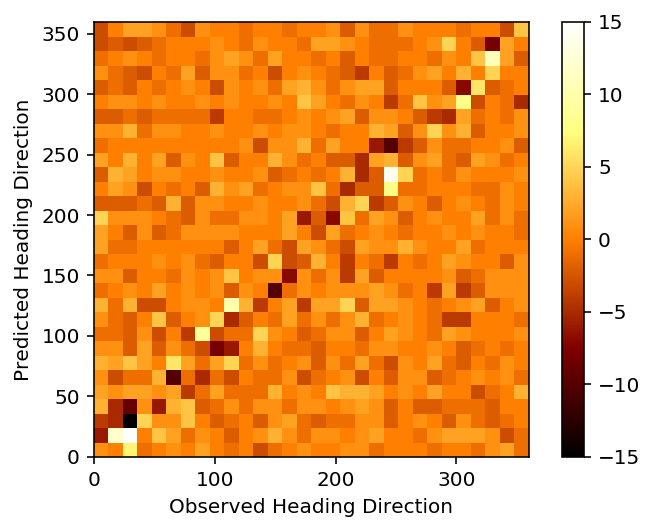

In [13]:
heatmap, xedges, yedges = np.histogram2d(true_angles, true_angles, bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
diff = all_h1.T-all_h2.T


plt.clf()
plt.imshow(diff, extent=extent, origin='lower', cmap='afmhot')
plt.colorbar()
plt.ylabel('Predicted Heading Direction')
plt.xlabel('Observed Heading Direction')
plt.show()

In [9]:
from scipy.stats import pearsonr
print(pearsonr(true_angles[:,0], true_angles[:,1]))
print(pearsonr(false_angles[:,0], false_angles[:,1]))

IndexError: too many indices for array